In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
from scipy.stats import ttest_ind
plt.style.use('ggplot')

In [3]:
PAST_DATE = datetime.date.today() - timedelta(days = 1)

# NIFTY 50 Index

In [6]:
nifty = yf.Ticker("^NSEI")
nifty_data = nifty.history(start="2000-04-01", end= PAST_DATE.strftime("%Y-%m-%d"))

In [7]:
nifty_data['MA50'] = nifty_data['Close'].rolling(50).mean()

In [8]:
nifty_data['MA200'] = nifty_data['Close'].rolling(200).mean()

### For the comparing the MA50 and MA200, we will do the analysis from the last 1 year

In [10]:
START_DATE = datetime.date(2024 , 5, 1)

In [11]:
nifty_data = nifty_data.reset_index()
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data_last_6_months = nifty_data[nifty_data['Date'].dt.date >= START_DATE].copy()
nifty_data_last_6_months = nifty_data_last_6_months.set_index('Date')

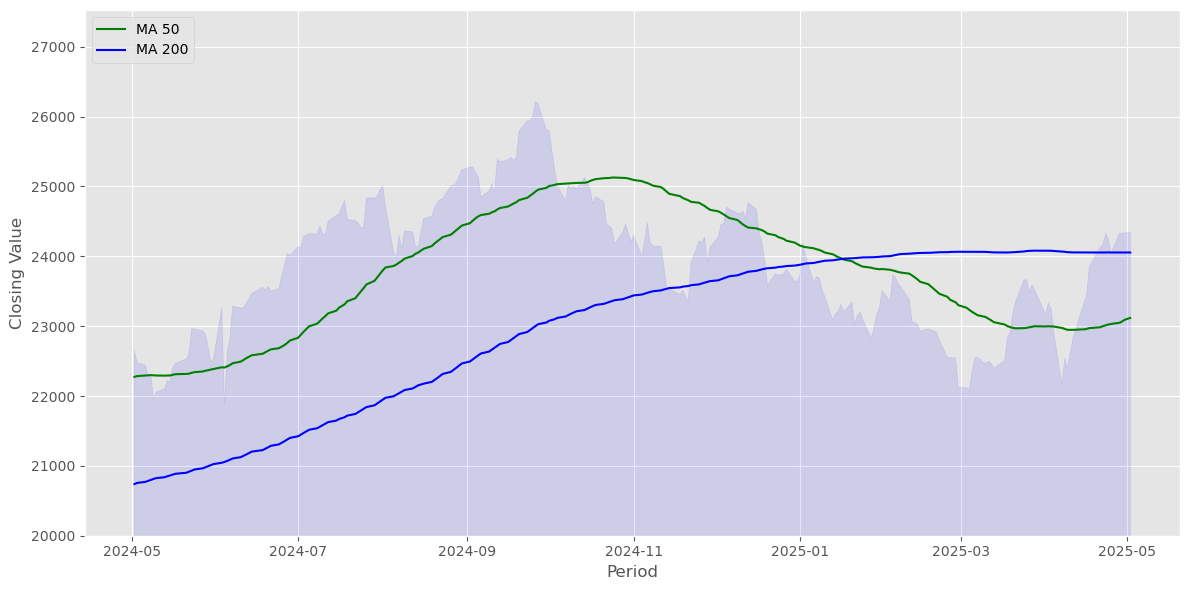

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
# ax.plot(nifty_data.index , nifty_data['Close'], color = 'blue', marker = '', label = 'Actual')
ax.fill_between(nifty_data_last_6_months.index, nifty_data_last_6_months['Close'], color = 'blue', alpha = 0.1)
ax.plot(nifty_data_last_6_months.index , nifty_data_last_6_months['MA50'], color = 'green', marker = '', label = 'MA 50')
ax.plot(nifty_data_last_6_months.index , nifty_data_last_6_months['MA200'], color = 'blue', marker = '', label = 'MA 200')
ylim = ax.get_ylim()
ax.set_ylim([20000 , ylim[1]])
ax.set_ylabel('Closing Value')
ax.set_xlabel('Period')
ax.legend(loc = 'upper left')

### This shows the overall market trend of last 1 year. Market was falling but slightly improved in the last months

# ABB

In [20]:
abb = yf.Ticker("ABB.NS")
abb = abb.history(start="2000-04-01", end= PAST_DATE.strftime("%Y-%m-%d"))

In [22]:
abb['MA50'] = abb['Close'].rolling(50).mean()
abb['MA200'] = abb['Close'].rolling(200).mean()

In [23]:
abb = abb.reset_index()
abb['Date'] = pd.to_datetime(abb['Date'])
abb_6_months = abb[abb['Date'].dt.date >= START_DATE].copy()
abb_6_months = abb_6_months.set_index('Date')

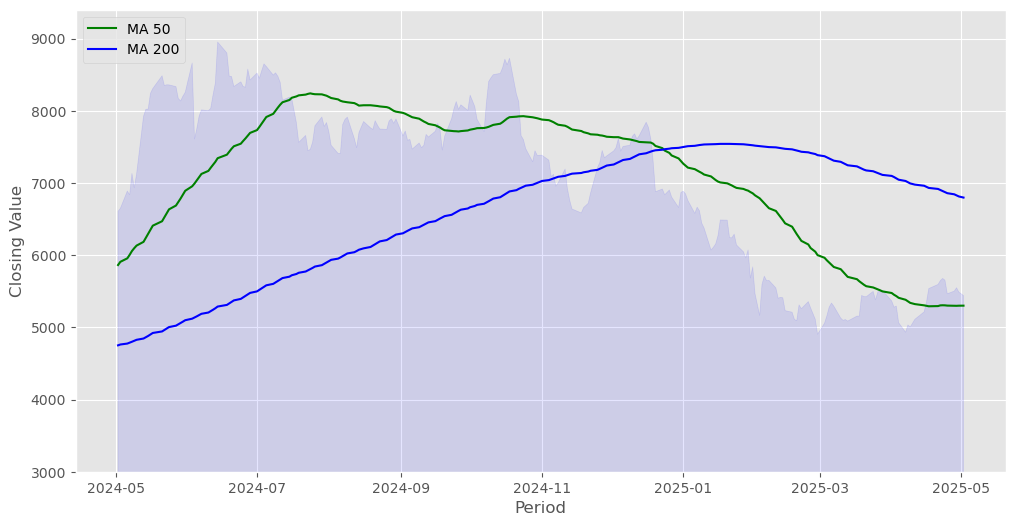

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
# ax.set_ylim([20000 , ylim[1]])
# ax.plot(nifty_data.index , nifty_data['Close'], color = 'blue', marker = '', label = 'Actual')
ax.fill_between(abb_6_months.index, abb_6_months['Close'], color = 'blue', alpha = 0.1)
ax.plot(abb_6_months.index , abb_6_months['MA50'], color = 'green', marker = '', label = 'MA 50')
ax.plot(abb_6_months.index , abb_6_months['MA200'], color = 'blue', marker = '', label = 'MA 200')
ylim = ax.get_ylim()
ax.set_ylim([3000 , ylim[1]])
ax.set_ylabel('Closing Value')
ax.set_xlabel('Period')
ax.legend(loc = 'upper left')

### ABB also shows the downward trend, can be risky to invest now.

# Comparing the two

In [30]:
new = pd.DataFrame(
    {
    'nifty': nifty_data.set_index('Date')['Close'],
    'abb': abb.set_index('Date')['Close']
    }
).dropna()

### we need to bring them on the same scale to compare

In [34]:
normalized_abb = new['abb'] / new['abb'].iloc[0] * 100
normalized_nifty = new['nifty'] / new['nifty'].iloc[0] * 100

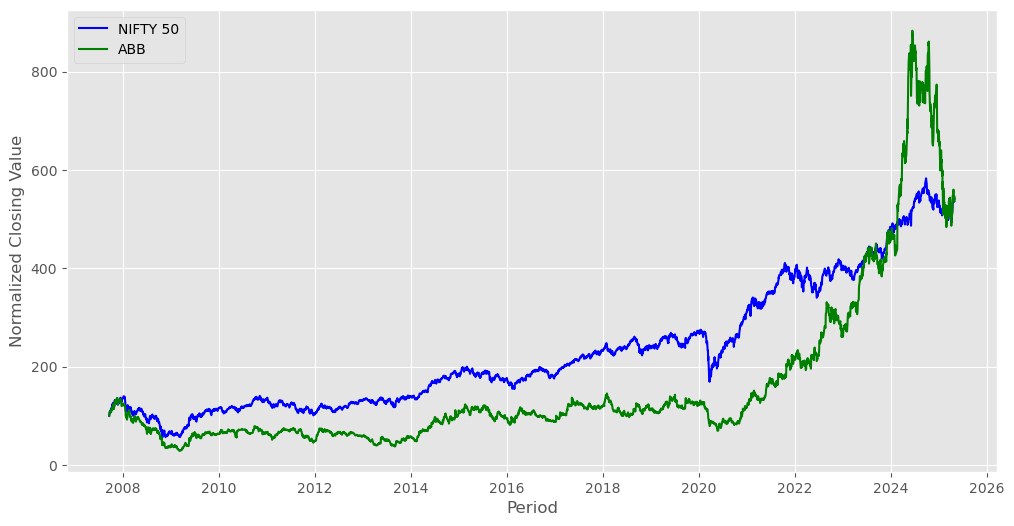

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
# ax.set_ylim([20000 , ylim[1]])
# ax.plot(nifty_data.index , nifty_data['Close'], color = 'blue', marker = '', label = 'Actual')
# ax.fill_between(abb_6_months.index, abb_6_months['Close'], color = 'blue', alpha = 0.1)
# ax.plot(abb_6_months.index , abb_6_months['MA50'], color = 'green', marker = '', label = 'MA 50')
ax.plot(normalized_nifty.index , normalized_nifty, color = 'blue', marker = '', label = 'NIFTY 50')
ax.plot(normalized_abb.index , normalized_abb, color = 'green', marker = '', label = 'ABB')
ax.set_ylabel('Normalized Closing Value')
ax.set_xlabel('Period')
ax.legend(loc = 'upper left')

### so ABB constantly underperformed the Nifty 50 till 2020, after that the gap was narrowed down and value peaked in the month of May 2024, but again sharply declined.

# Cumalative Returns

### Here we are trying to find out that if we have invested ₹1 in January 2000, how much would that investment be worth today, in 2025, assuming we reinvest all returns?

In [41]:
abb_returns = abb.set_index('Date')['Close'].resample('ME').ffill().pct_change() * 100
nifty_returns = nifty_data.set_index('Date')['Close'].resample('ME').ffill().pct_change() * 100

In [43]:
monthly_returns = pd.DataFrame({
    'ABB': abb_returns,
    'Nifty 50': nifty_returns
}).dropna()

In [45]:
cumulative = (1 + monthly_returns / 100).cumprod()

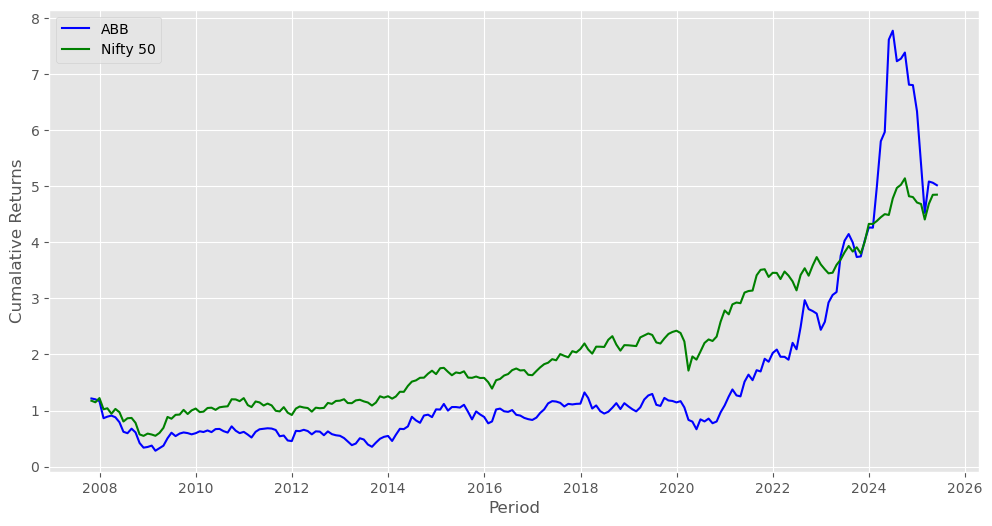

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
# ax.set_ylim([20000 , ylim[1]])
# ax.plot(nifty_data.index , nifty_data['Close'], color = 'blue', marker = '', label = 'Actual')
# ax.fill_between(abb_6_months.index, abb_6_months['Close'], color = 'blue', alpha = 0.1)
# ax.plot(abb_6_months.index , abb_6_months['MA50'], color = 'green', marker = '', label = 'MA 50')
ax.plot(cumulative.index , cumulative['ABB'], color = 'blue', marker = '', label = 'ABB')
ax.plot(cumulative.index , cumulative['Nifty 50'], color = 'green', marker = '', label = 'Nifty 50')
ax.set_ylabel('Cumalative Returns')
ax.set_xlabel('Period')
ax.legend(loc = 'upper left')

In [48]:
nifty_50_returns = (cumulative['Nifty 50'].iloc[-1] - 1) * 100
abb_returns = (cumulative['ABB'].iloc[-1] - 1) * 100

In [49]:
nifty_50_returns , abb_returns

(384.8636073018287, 401.70963885487316)

In [53]:
cumulative[cumulative['ABB'] >= 6]

,ABB,Nifty 50
Date,,
2024-05-31 00:00:00+05:30,7.613041,4.486980
2024-06-30 00:00:00+05:30,7.771333,4.781702
2024-07-31 00:00:00+05:30,7.227626,4.969012
2024-08-31 00:00:00+05:30,7.273369,5.025720
2024-09-30 00:00:00+05:30,7.382386,5.140221
2024-10-31 00:00:00+05:30,6.809071,4.820486
2024-11-30 00:00:00+05:30,6.801556,4.805699
2024-12-31 00:00:00+05:30,6.335059,4.708853


### Returns of ABB is 401 % while nifty 50 returns are 384 %, the slight increase in the ABB cumalative returns is because of the very high monthly returns of ABB from the period May 2024 till Dec 2024, however its decreasing now.

### Readable from the graph itself, that ABB has constantly underperformed than the NIFTY 50, but lets confirm with a statistical test.

# Statistical Test based on Cumalative returns

### To assess whether ABB has significantly outperformed the Nifty 50 index over the selected time period, we conducted a two-sample t-test using cumulative returns:

In [59]:
t_stat, p_val = ttest_ind( cumulative['Nifty 50'].fillna(0) , cumulative['ABB'].fillna(0), equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 4.152756090092063, P-value: 4.0423382579855466e-05


### The positive t-statistic of 4.15 indicates that our first sample i.e cumalative returns of Nifty 50 differs from the ABB by ~ 4 units on an average.
### The p-value of 0.0004 indicates that the chances of having such a huge difference is not by random chance or noise. 
### The difference between the cumalative returns of ABB and Nifty 50 is statiscally significant.

### so we can say that ABB has significantly underperformed the Nifty 50 index over the analyzed time period.